# Machine Learning and Statistics

Tasks notebook for Machine Learning and Statistics @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: [mizydorek](https://github.com/mizydorek/Machine-Learning-Tasks-2020)


***

### Task 1 - Square root of 2

*Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places.*

$$ \sqrt{2} $$

*"The square root of 2 is irrational"*

Numbers that cannot be expressed as a ratio or fraction of natural numbers are called irrational and the famous example is the square root of 2, which is roughly 1.4142 and written in mathematics as $ \sqrt{2} $ or $ 2^{1/2} $. It is a positive algebraic number which multiplied by itself, equals 2. Geometrically is represented as diagonal across a square with sides of one unit length.[1]

### Heron's method

It is a most common iterative method [2] for approximating square roots known as the Heron's method after the first-century Greek philosopher Heron of Alexandria.[3] It takes an approximate guess and returns a new approximate result that is more accurate than the last one. This can be repeated as many times until the desired accuracy is reached.[4,5]

$$ x_{n+1} = \frac{x_{n} + \frac{a}{x_{n}}}{2} $$



In [1]:
# finding on how to generate square root of an integer to a digits of precision https://stackoverflow.com/questions/5187664/generating-digits-of-square-root-of-2

def sqrt2():
    '''
    Function that counts square root of 2 to 100 decimal places
    '''
    # Initial values
    a = 2
    digits = 100
    
    # finding the square root of 2 after multiplying by 10 raised to the 2* digits
    a = a * (10**(2*digits))
    x_n = 0
    x_n1 = 1 * (10**digits)

    # Apply Heron's method 
    while x_n != x_n1:
        x_n = x_n1
        x_n1 = (x_n + (a // x_n)) >> 1

    # convert to string 
    string = str(x_n1)
    # print out the result 
    print('The square root of 2 to 100 decimal places:')
    print("%s.%s" % (string[0:1], string[1:digits]))

if __name__ == '__main__':
    sqrt2()

The square root of 2 to 100 decimal places:
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572


### Verification

The result can be compare against *"The Square Root of Two to 1 Million Digits"* found on Nasa website.[6]



1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572

### References

[1] Square root of 2 https://en.wikipedia.org/wiki/Square_root_of_2

[2] Heron's method http://assets.press.princeton.edu/chapters/s9487.pdf

[3] Square root https://en.wikipedia.org/wiki/Square_root

[4] Computing square root https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

[5] A Note on Machine Method for Root Extraction http://www.spm.uem.br/bspm/pdf/next/151.pdf

[6] The Square Root of Two to 1 Million Digits https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil


<br>

***

<br>

#### Task 2 - The Chi Square test

*Use scipy.stats to verify value and calculate the associated p value for table posted on the Wikipedia Chi-Square article. You should include a short note with references justifying your analysis in a markdown cell.*

The formula to calculate Chi-square value or $ X^{2} $ is:

$$ X^{2} = \sum_{k=1}^n \frac{(O_k - E_k)^2}{E_k}$$
 
Where $ X $ is 22nd letter of Greek alphabet - Chi.

Chi-Square test is a statistical hypothesis test to determine whether there is a statistically significant difference between the expected  and the observed frequencies in one or more categories of a contingency table.

### Contingency table

A table showing the distribution of 3 groups of workers across four neighborhoods with a total number of 650 observed values.

|   | A | B | C | D | Total |
|---|:---:|:---:|:---:|:---:|:---:|
| White collar | 90 | 60 | 104 | 95 | 349 |
| Blue collar  | 30 | 50 | 51 | 20 | 151 |
| No collar | 30 | 40 | 45 | 35 | 150 |
| <b>Total</b> | <b>150</b> | <b>150</b> | <b>200</b> | <b>150</b> | <b>650</b> |

### Define the Hypothesis

A statistical method which evaluates two Hypothesis (statements) and determines which is true is called a Hypothesis Test.

H0: The residents and group of workers are not independent.

H1: The residents and group of workers are independent.

### Significance Level 

Also called as alpha value is a treshhold that determines whether the null hypothesis should be rejected or not. For the null hypothesis to be rejected the p-value should be less than the significance level. Usually in the range of 0.01 to 0.1

If p-value <= alpha: significant result, reject null hypothesis (H0)

If p-value > alpha: not significant result, fail to reject null hypothesis (H0)

In [2]:
alpha = 0.05

### Degrees of freedom

*degrees of freedom formula: (rows - 1) * (cols - 1)*

In our case:

Rows = 3 groups of workers

Columns = 4 neighborhoods

So we take (3 – 1) and multiply by (4 – 1) to get 6 degrees of freedom.

In [3]:
dof = 6

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats

### Dataset 

In [5]:
# Data set 
data = {'A':[90, 30, 30, 150],
        'B':[60, 50, 40, 150],
        'C':[104, 51, 45, 200],
        'D':[95, 20, 35, 150],
        'Total':[349, 151, 150, 650]} 

# Create a data frame
df = pd.DataFrame(data, index=['White collar', 'Blue collar', 'No collar', 'All'])
df

,A,B,C,D,Total
White collar,90,60,104,95,349
Blue collar,30,50,51,20,151
No collar,30,40,45,35,150
All,150,150,200,150,650


In [6]:
# 
observed = pd.DataFrame(df.iloc[0:3,0:4])
observed

,A,B,C,D
White collar,90,60,104,95
Blue collar,30,50,51,20
No collar,30,40,45,35


### Expected Frequency

Using formula below we calculate the expected frequency for each cell.

Expected = (row total * column total) / grand total


In [7]:
# np.outer compute the outer product of two vectors.
expected =  np.outer(df["Total"][0:3], df.loc["All"][0:4]) / 650

expected = pd.DataFrame(expected, 
            index=["White collar","Blue collar","No collar"], 
            columns=["A","B","C","D"])
expected


,A,B,C,D
White collar,80.538462,80.538462,107.384615,80.538462
Blue collar,34.846154,34.846154,46.461538,34.846154
No collar,34.615385,34.615385,46.153846,34.615385


### Chi-Square Statistic 

In [8]:
# Calculates the Chi-Square
# https://www.mathsisfun.com/data/chi-square-test.html
chi2_stat = (((observed-expected)**2)/expected).sum().sum()
chi2_stat

24.571202858582602

### Find the p-value


In [9]:
# Calculates the p value using Scipy chi2 module
# or approximate value can be taken from Chi-Square distribution tabel
# http://kisi.deu.edu.tr/joshua.cowley/Chi-square-table.pdf
p_value = 1 - stats.chi2.cdf(x=chi2_stat, df=6)
p_value

0.0004098425861096544

### SciPy chi2_contingency

All above calculation can be done using SciPy chi2_contingency module by passing just a Contingency table.


In [10]:
chi2, p, dof, expected = stats.chi2_contingency(observed)
print('Chi2: {}\n\nP-value: {}\n\nDegrees of freedom: {}\n\n'.format(chi2, p, dof))
expected = pd.DataFrame(expected, 
            index=["White collar","Blue collar","No collar"], 
            columns=["A","B","C","D"])
print('Expected Frequency:\n', expected)

Chi2: 24.5712028585826

P-value: 0.0004098425861096696

Degrees of freedom: 6


Expected Frequency:
                       A          B           C          D
White collar  80.538462  80.538462  107.384615  80.538462
Blue collar   34.846154  34.846154   46.461538  34.846154
No collar     34.615385  34.615385   46.153846  34.615385


### Evaluate the Hypothesis

In [11]:
# Evaluate whether to reject or fail to reject null hypothesis
if p_value <= alpha:
    print('Dependent, reject null hypothesis (H0)')
else:
    print('Independent, fail to reject null hypothesis (H0)')

Dependent, reject null hypothesis (H0)


### Interpretation

The p-value obtained from Chi-Square test for independence on a given data set clearly shown that is significant and rejected null hypothesis. To conclude further, there is a significant relation between groups of workers across four neighborhoods. 

#### References

[1] Chi-Square test https://en.wikipedia.org/wiki/Chi-squared_test

[2] Scipy chi2 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

[3] Scipy chi2_contingency https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

[4] Chi-Square Distribution Table http://kisi.deu.edu.tr/joshua.cowley/Chi-square-table.pdf

[5] Contingency table https://en.wikipedia.org/wiki/Contingency_table

[6] Pearson's chi-squared test https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

***

#### Task 3 - The standard deviation 

*The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) . However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and . The STDEV.P function performs the above calculation but in the   calculation the division is by len(x)-1 rather than len(x) . Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.*



The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean. In other words, the standard deviation tells, on average, how the values spread out from the center of the distribution. It is useful measure of spread for normal distribution where data is symmetrically distributed with no skew. If the data points are far from the mean, there is a high standard deviation within the data set, while the more clustered close to the mean (also called the expected value), the lower the standard deviation.[1]

Standard deviation is represented by the lower case Greek letter sigma $\sigma$, for the population standard deviation, or the Latin letter $s$, for the sample standard deviation.[2]

The Formula for Standard Deviation

$$ \sigma = \sqrt \frac {\sum_{i=1}^n(x_i - \overline x)^2} {n} $$

where: $ x_i $ = value of the $i^{th}$ point in the data set, $\overline x$ = the mean value of the data set and $n$ = the number of data points in the data set.

**STDEV.S** is an Excel Statistical function that estimates standard deviation by using the "n-1 method" based on a sample of the population (ignores logical values and text in the sample) whereas **STDEV.P** uses "n method" to estimates the standard deviation for the entire population.[3,4]

The standard deviation is calculated as the square root of the variance and formula depends on whether relay on a whole population or just a sample of the population.

The population standard deviation formula looks like this:

$$ \sigma = \sqrt \frac {\sum_{i=1}^n(x_i - \overline x)^2} {n} $$

The sample standard deviation formula looks like this:

$$ S = \sqrt \frac {\sum_{i=1}^n(x_i - \overline x)^2} {n-1} $$


With samples, we use n – 1 in the formula instead of n  because using n would give a biased estimate that consistently underestimates the population variance and the sample standard deviation would tend to be lower then the standard deviation of the population. 
This method is called **Bessel's correction**[5],  named after Friedrich Bessel, that corrects the bias in the estimation of the population variance. However, reducing the sample to n – 1 increases the standard deviation, giving a conservative estimate of variance. While this is not an unbiased estimate of the true population standard seviation, it is better to overestimate rather than underestimate variance of samples.[6]

In [12]:
# Import packages.
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 14, 10
# Construct a new Generator with the default BitGenerator (PCG64).
rng = np.random.default_rng(1)

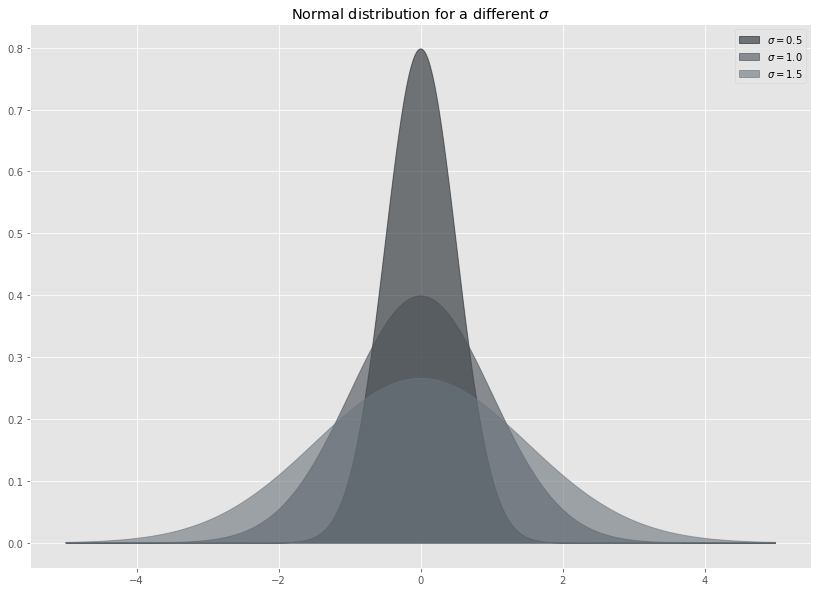

In [13]:
# Draw examples of normal distribution with different sigma values.
x = np.linspace(-5.0, 5.0, 1000)
plt.fill(x, ss.norm.pdf(x, loc=0.0, scale=0.5), color='#212529', alpha=0.6, lw=1.0, label="$\sigma = 0.5$");
plt.fill(x, ss.norm.pdf(x, loc=0.0, scale=1.0), color='#495057', alpha=0.6, lw=1.0, label="$\sigma = 1.0$");
plt.fill(x, ss.norm.pdf(x, loc=0.0, scale=1.5), color='#6C757D', alpha=0.6, lw=1.0, label="$\sigma = 1.5$");

plt.title("Normal distribution for a different $\sigma$")
plt.legend();

#### Empirical Rule
It is statistical rule also known as the three-sigma rule or 68-95-99.7 rule which states that that almost all observed data will lie within a band of three standard deviations of the mean in a normal distribution.[7]

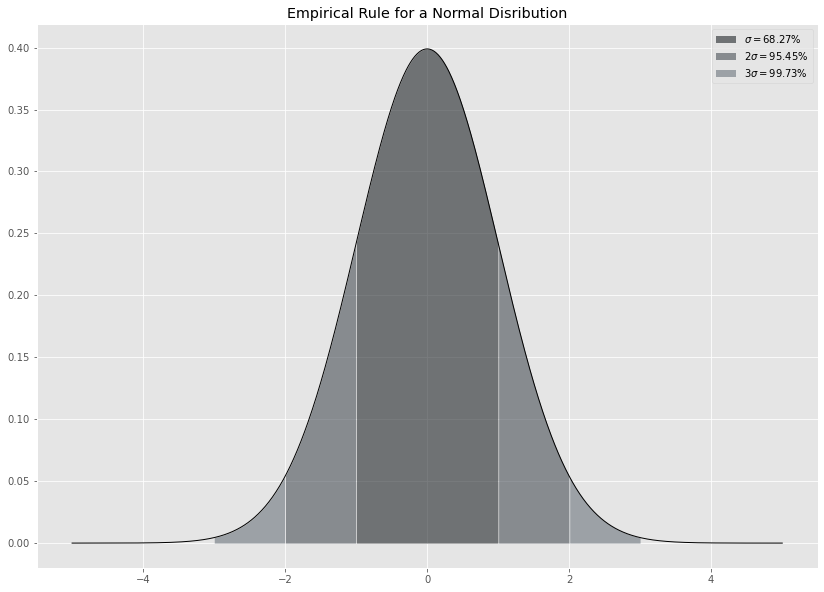

In [14]:
# Draw example of empirical rule and mark sigma bands.
x = np.linspace(-5.0, 5.0, 1000)
plt.plot(x, ss.norm.pdf(x, loc=0.0, scale=1.0), 'k-', lw=1.0);

# σ
sigma = x[(-1.0 <= x) & (x <= 1.0)]
plt.fill_between(sigma, ss.norm.pdf(sigma), color='#212529', alpha=0.6, linewidth=0, label="$\sigma = 68.27\%$");
# 2σ
sigma = x[(-2.0 <= x) & (x <= -1.0)]
plt.fill_between(sigma, ss.norm.pdf(sigma), color='#495057', alpha=0.6, linewidth=0);
sigma = x[(1.0 <= x) & (x <= 2.0)]
plt.fill_between(sigma, ss.norm.pdf(sigma), color='#495057', alpha=0.6, linewidth=0, label="$2\sigma = 95.45\%$");
# 3σ
sigma = x[(-3.0 <= x) & (x <= -2.0)]
plt.fill_between(sigma, ss.norm.pdf(sigma), color='#6C757D', alpha=0.6, linewidth=0);
sigma = x[(2.0 <= x) & (x <= 3.0)]
plt.fill_between(sigma, ss.norm.pdf(sigma), color='#6C757D', alpha=0.6, linewidth=0, label="$3\sigma = 99.73\%$");

plt.title("Empirical Rule for a Normal Disribution")
plt.legend();

#### Normal distribution on the example of IQ score
Simulate IQ score as an example of normal distribution, with a mean μ of 100 and standard deviation σ of 15 for 10k population.[8]

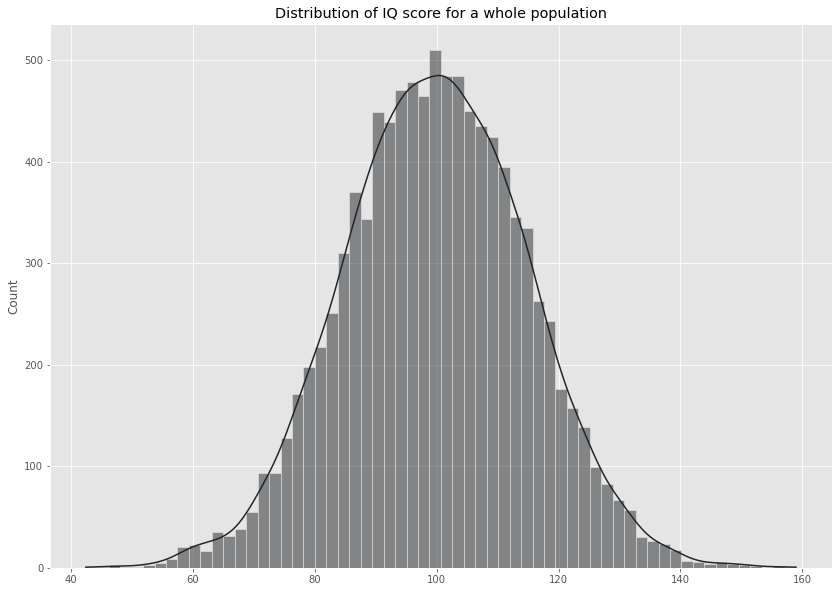

In [15]:
# Numpy normal function that draws random samples from the normal distribution 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
mu, sigma, size = 100, 15, 10000
p = rng.normal(mu, sigma, size)
# Draws hist plot of the population
sns.histplot(p, kde=True, color='#212529');
plt.title("Distribution of IQ score for a whole population");

In [16]:
# Let's counts std for whole population and compare with numpy built-in function for a correctness
# Finding on how to calculate mean and Standard deviation.
# https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/measuring-spread-quantitative/v/sample-standard-deviation-and-bias
# https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/2-mean-and-standard-deviation
mean = p.sum() / size

stdev_p = np.sqrt(np.sum(np.square(p - mean))/size)
# compare with built-in function 
np.std(p) == stdev_p

True

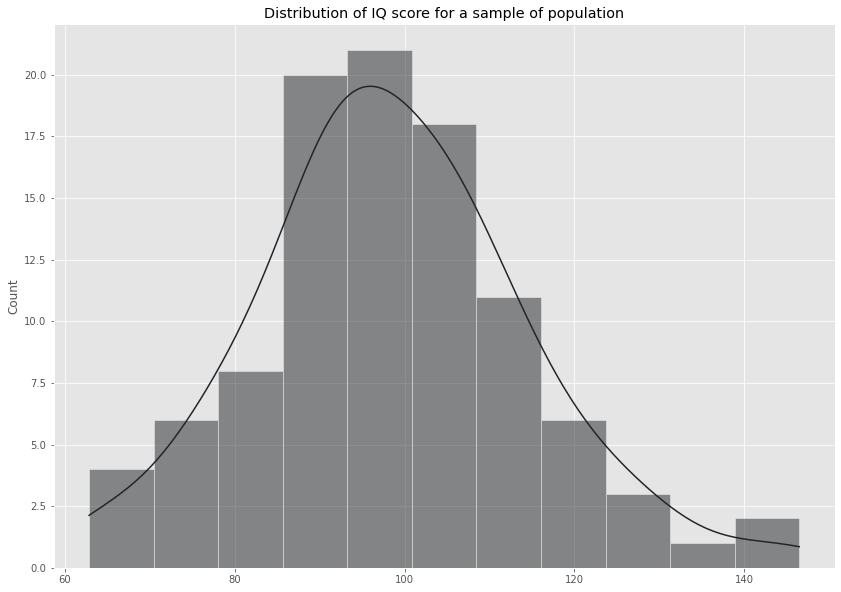

In [17]:
# Take a sample of 1% out of the population
# count stdev_s & stdev_p for sample of the population
sample = int(size * 0.01)

# Numpy choice function used to sample out of the population
s = rng.choice(p, size=sample, replace=False)
mean = s.sum() / sample

sns.histplot(s, kde=True, color='#212529');
plt.title("Distribution of IQ score for a sample of population");

In [18]:
stdev_p = np.sqrt(np.sum(np.square(s - mean))/sample)
stdev_s = np.sqrt(np.sum(np.square(s - mean))/(sample - 1))
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
std = np.std(s, ddof=15)
print('Comparison of calculation the standard deviation using STDEV.P, STDEV.S and numpy std() functions for a sample of population:')
print('STDEV.P: {:2.5f}\nSTDEV.S: {:2.5f}\nSTD: {:2.5f}'. format(stdev_p, stdev_s, std))


Comparison of calculation the standard deviation using STDEV.P, STDEV.S and numpy std() functions for a sample of population:
STDEV.P: 15.71433
STDEV.S: 15.79350
STD: 17.04458


#### References

[1] — [Standard Deviation Definition](https://www.investopedia.com/terms/s/standarddeviation.asp)

[2] — [Standard deviation](https://en.wikipedia.org/wiki/Standard_deviation)

[3] — [STDEV.S](https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23)

[4] — [STDEV.P](https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285#:~:text=P%20function,-Excel%20for%20Microsoft&text=Calculates%20standard%20deviation%20based%20on,average%20value%20(the%20mean))

[5] — [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction)

[6] — [Khan Academy: Sample standard deviation and bias](https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/measuring-spread-quantitative/v/sample-standard-deviation-and-bias)

[7] — [Empirical rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

[8] — [Real-Life Applications of the Normal Distribution](https://socratic.org/statistics/statistical-distributions/real-life-applications-of-the-normal-distribution)

***

#### Task 4 - K-means clustering on the iris dataset
*Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.*

#### — K-means
Cluster analysis is an unsupervised learning method that looks for previously undetected patterns in a data set and group them into set of data based on similar characteristics. In general, it can help find meaningful structure among data, group similar data together and discover underlying patterns. One of the most common and simplest clustering methods out there is the K-Means algorithm. Algorithm partitions the data into set by randomly selected centroids then performs iterative calculation to optimize the positions of the centroids and selects the datapoints that are closest to that centroid into the cluster.

[Sklearn KMeans function will be used to perform K-means clustering on the Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit)



#### — Fisher's Iris dataset
Introduced by the British statistician and biologist Ronal Fisher in 1936 in his paper *The use of multiple measurements in taxonomic problems* the Iris flower data set is a multivariate data set which was used to developed a linear discriminant model. Data set consists 50 flowers form each of three species of Iris (setosa, virginica, versicolor) and four attributes from each specie: the length and the width of the sepals and petals, in centimeters.

In [19]:
# Numerical arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd 

# Machine learning - Kmeans.
import sklearn.cluster as skcl

# Plotting.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings.
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 14, 10

# Set your custom color palette.
colors = ["#6C757D", "#212529", "#ADB5BD"]
sns.set_palette(sns.color_palette(colors))
cmap = matplotlib.colors.ListedColormap(colors)

In [20]:
# Load dataset.
df = pd.read_csv("https://raw.githubusercontent.com/mizydorek/pands-project-2020/master/iris.csv")
# Display first 5 rows of dataset. 
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


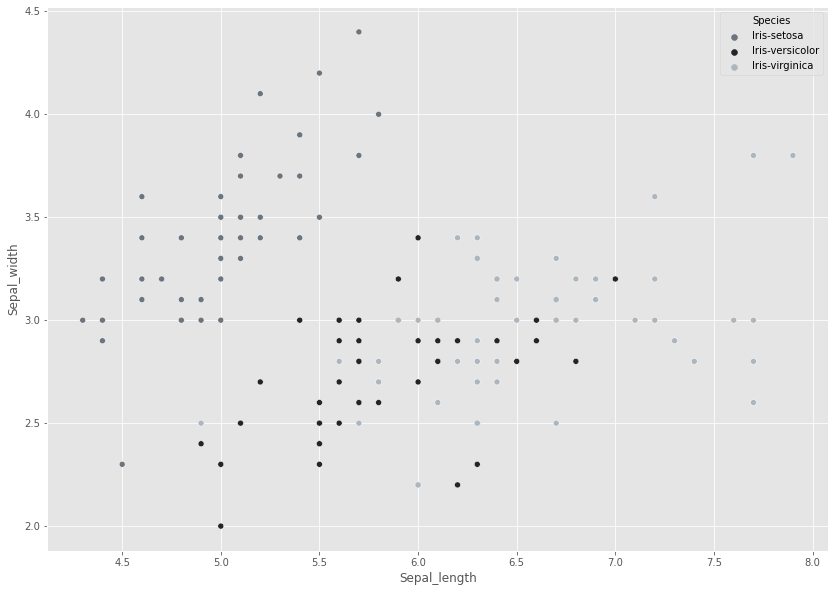

In [21]:
# Have a look at dataset by using both scatter and pair plots
sns.scatterplot(data=df, x="Sepal_length", y="Sepal_width", hue="Species", legend="full");

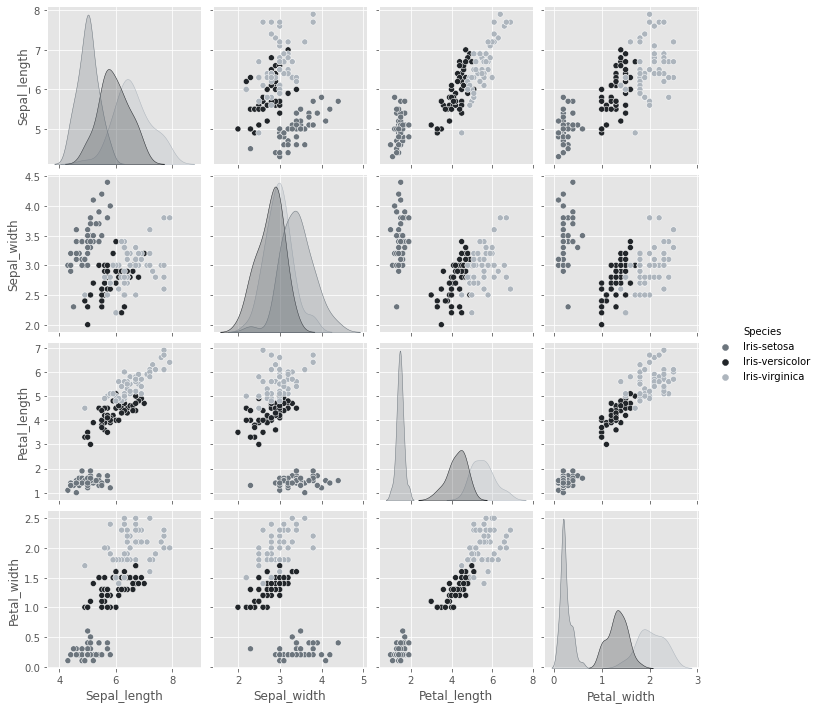

In [22]:
sns.pairplot(data=df, hue="Species");

In [23]:
# Another way of deeper understanding of the data by checking correlations between 4 features of Iris flowers.
df.iloc[:,[0,1,2,3]].corr()

,Sepal_length,Sepal_width,Petal_length,Petal_width
Sepal_length,1.000000,-0.109369,0.871754,0.817954
Sepal_width,-0.109369,1.000000,-0.420516,-0.356544
Petal_length,0.871754,-0.420516,1.000000,0.962757
Petal_width,0.817954,-0.356544,0.962757,1.000000


In [24]:
# Converts DataFrame to NumPy array to perform Kmeans
x = df.iloc[:, [0, 1, 2, 3]].to_numpy()
# Displays first 10 rows.
x[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [25]:
# Kmeans clustering.
kmeans = skcl.KMeans(n_clusters = 3, random_state = 0)

In [26]:
# Fit Kmeans algorithm with Iris dataset.
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [27]:
# label points of the clusters.
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [28]:
# checks center points of the clusters.
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [29]:
# Add kmeans labels as a column to NumPy array.
# https://numpy.org/doc/stable/reference/generated/numpy.c_.html
# https://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-a-numpy-array
x = np.c_[ x, kmeans.labels_ ]
x[:10]

array([[5.1, 3.5, 1.4, 0.2, 1. ],
       [4.9, 3. , 1.4, 0.2, 1. ],
       [4.7, 3.2, 1.3, 0.2, 1. ],
       [4.6, 3.1, 1.5, 0.2, 1. ],
       [5. , 3.6, 1.4, 0.2, 1. ],
       [5.4, 3.9, 1.7, 0.4, 1. ],
       [4.6, 3.4, 1.4, 0.3, 1. ],
       [5. , 3.4, 1.5, 0.2, 1. ],
       [4.4, 2.9, 1.4, 0.2, 1. ],
       [4.9, 3.1, 1.5, 0.1, 1. ]])

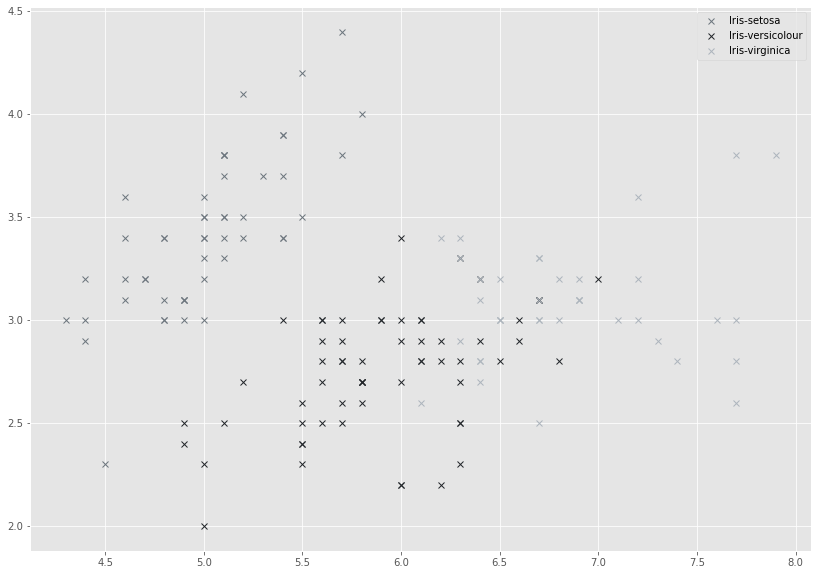

In [30]:
# Plots the clusters.
plt.plot(x[kmeans.labels_ == 1][:,0], x[kmeans.labels_ == 1][:,1], 'x', label = 'Iris-setosa');
plt.plot(x[kmeans.labels_ == 2][:,0], x[kmeans.labels_ == 2][:,1], 'x', label = 'Iris-versicolour');
plt.plot(x[kmeans.labels_ == 0][:,0], x[kmeans.labels_ == 0][:,1], 'x', label = 'Iris-virginica');
plt.legend();

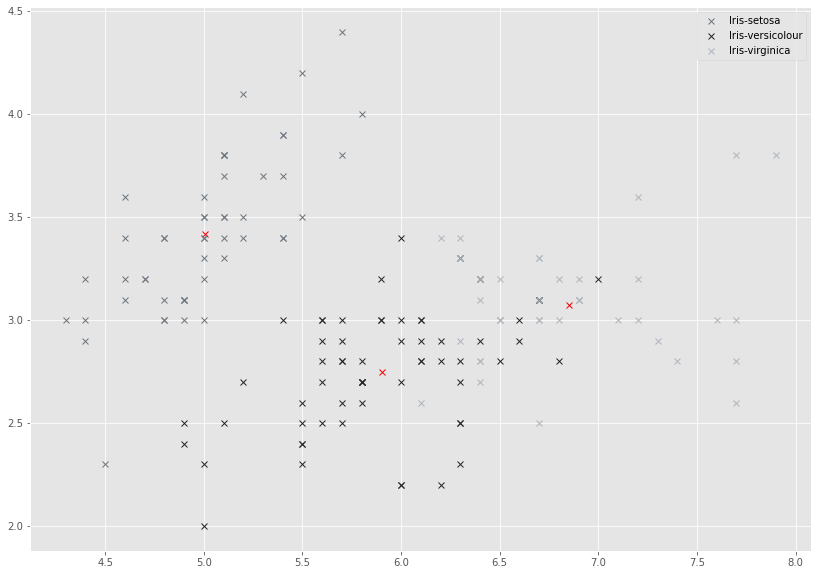

In [31]:
# Marks the center point of clusters on the plot.
centroid = kmeans.cluster_centers_
plt.plot(centroid[:,0], centroid[:,1], 'rx');

plt.plot(x[kmeans.labels_ == 1][:,0], x[kmeans.labels_ == 1][:,1], 'x', label = 'Iris-setosa');
plt.plot(x[kmeans.labels_ == 2][:,0], x[kmeans.labels_ == 2][:,1], 'x', label = 'Iris-versicolour');
plt.plot(x[kmeans.labels_ == 0][:,0], x[kmeans.labels_ == 0][:,1], 'x', label = 'Iris-virginica');
plt.legend();

In [32]:
# adds kmeans cluster labels column to DataFrame
df['Cluster'] = kmeans.labels_

In [33]:
# Function that recognizes iris species by cluster label and returns specie name. 
def label(cluster):
    if cluster == 0:
        return 'Iris-virginica'
    if cluster == 1:
        return 'Iris-setosa'
    if cluster == 2:
        return 'Iris-versicolor'

In [34]:
# Creates Label column by applying cluster function to Cluster column
df['Label']=df['Cluster'].apply(label)
df

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species,Cluster,Label
0,5.1,3.5,1.4,0.2,Iris-setosa,1,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,1,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,1,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,1,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,1,Iris-setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,2,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-virginica,0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,0,Iris-virginica


In [35]:
# To checks kmeans prediction of the species, 
# Pandas crosstab() function will be use that takes two or more columns and returns a frequency of each combination.
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
pd.crosstab(df['Species'],df['Label'])

Label,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,50,0,0
Iris-versicolor,0,48,2
Iris-virginica,0,14,36


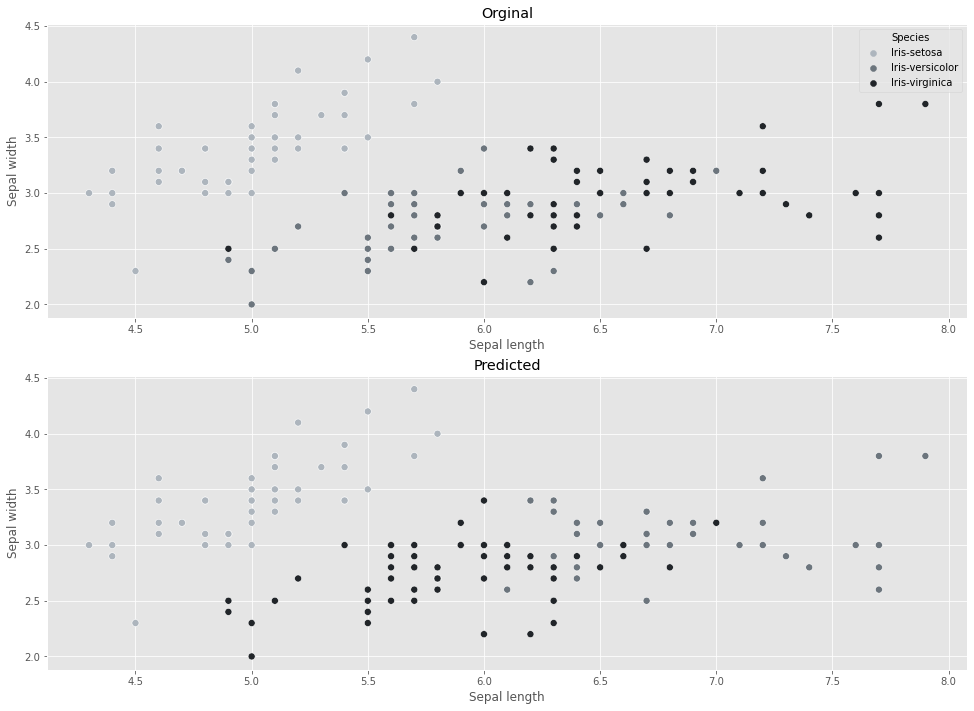

In [42]:
# Visualize the predictions of kmeans algorithm by plotting scatter plots both original and predicted data.
fig, axes = plt.subplots(2, 1)
sns.scatterplot(data=df, x="Sepal_length", y="Sepal_width", hue="Species", s=50, ax=axes[0]).set(title='Orginal', xlabel='Sepal length', ylabel='Sepal width');

# Set your custom color palette.
colors = ["#6C757D", "#ADB5BD", "#212529", ]
sns.set_palette(sns.color_palette(colors))
cmapp = matplotlib.colors.ListedColormap(colors)
fig.tight_layout(pad=2.0)

sns.scatterplot(x=x[:, 0], y=x[:, 1], c=x[:,4], cmap=cmapp, s=50, ax=axes[1]).set(title='\nPredicted', xlabel='Sepal length', ylabel='Sepal width');

In [37]:
# Let's count kmeans prediction accuracy based on n_clusters=3.
accuracy = len(df[df['Species']==df['Label']])/len(df)
print('KMeans accuracy -> {0:.2f}%'.format(accuracy*100))

KMeans accuracy -> 89.33%


#### — Conclusion

K-means clustering is an widely used technique for data cluster analysis but also has some drawbacks. KMeans is sensitive to outliers, just like every other algorithm based on mean values. Its performance is not as competitive as those of the other sophisticated clustering techniques because slight variations in the data could lead to high variance. Furthermore, clusters are assumed to be spherical and evenly sized, something which may reduce the accuracy of the K-means clustering results.

Based on the K-Means models, the easiest specie to predict is Setosa and this is due to the specie distinctive features, both width and length of petal that are so disparate from the remaining two species. The hardest species to predict is the Virginica specie. Their attributes are very similar to the Versicolor specie, making it quite difficult to distinguish them from each other. This is clearly showed in some of the pair plots where there is a fair amount of overlapping. 

The accuracy of the K-means clustering method can be calculated by looking at the total number of correctly categorised data points against the whole population to check how accurate K-means can  predicted observations. In this case, K-Means cluster has an accuracy of 89.33%. 

#### References

[1] — [K-means clustering](https://en.wikipedia.org/wiki/K-means_clustering)

[2] — [Sci-kit Learn: K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_predict)

[3] — [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

[4] — [Pandas: Correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

[5] — [Ian Mcloughlin: Kmeans notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/kmeans-examples.ipynb)

[6] — [K-means clustering from a to z](https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a)

#### Task 4 - K Nearest Neighbor on the iris dataset
*Use scikit-learn to apply K Nearest Neighbor to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.*

#### — K Nearest Neighbor

K Nearest Neighbor falls in the category of supervised machine learning algorithms and can be used for both regression and classification predictive problems. Neighbors based learning method does not have a specialized training phase instead uses all of the data for training while classification and that is why it is a type of lazy learning algoritm. KNN is a non-parametric learning algorithm since it does not assume anything about the underlying data. It examines the labels of a chosen K-nearest number of data points surrounding a target data point in order to make a prediction about the class that the data point falls into.

#### — Fisher's Iris dataset
Introduced by the British statistician and biologist Ronal Fisher in 1936 in his paper *The use of multiple measurements in taxonomic problems* the Iris flower data set is a multivariate data set which was used to developed a linear discriminant model. Data set consists 50 flowers form each of three species of Iris (setosa, virginica, versicolor) and four attributes from each specie: the length and the width of the sepals and petals, in centimeters.

#### — Import Packages

In [1]:
# Numerical arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd 

# Plotting.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings.
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 14, 10

# Set your custom color palette.
colors = ["#6C757D", "#212529", "#ADB5BD"]
sns.set_palette(sns.color_palette(colors))
cmap = matplotlib.colors.ListedColormap(colors)

#### — Load dataset

In [2]:
# Load dataset.
df = pd.read_csv("https://raw.githubusercontent.com/mizydorek/pands-project-2020/master/iris.csv")
# Display first 5 rows of dataset. 
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### — Preprocessing

In [3]:
# Convert categories to numbers.
# https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers
df['Species'] = pd.Categorical(df['Species'])

In [4]:
# Add labels column to represent species in numeric values.
df['Labels'] = df['Species'].cat.codes
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species,Labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [5]:
# Create dictionary that map species with labels.
labels = dict(zip(df['Labels'].unique(),df['Species'].unique()))
labels

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [6]:
# Split dataset into its features and labels.

# Create features dataframe.
x = df.iloc[:, [0, 1, 2, 3]].to_numpy()
x[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [7]:
# Separate labels values.
# y = df['Species'].astype('category').cat.codes
y = df.iloc[:, 5].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

#### — Train Test Split

In [8]:
# Using train_test_split() from the scikit-learn library, makes it easy to split dataset into training and testing data.
from sklearn.model_selection import train_test_split

# Script splits the dataset into 75% train data and 25% test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#### — Build and train the model

In [9]:
# Machine learning - K Nearest Neighbor.
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier and set to 3 nearest points for a starter.
k = 3 

knn = KNeighborsClassifier(n_neighbors = k)

In [10]:
# Fit the classifier to the data.
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#### — Test the model

In [11]:
# Test the model by using predict function on the trained model to make a predictions on a test data.
prediction = knn.predict(x_test)

# show model predictions on the test data.
prediction[0:10]

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1], dtype=int8)

In [12]:
# Check accuracy of the model. 
score = knn.score(x_test,y_test)

print('— Accuracy: {:.2f}%'.format(score * 100))

— Accuracy: 97.37%


In [13]:
# Example with hypothetical iris features to validate prediction.
iris = knn.predict([[3.5,4.3,5.5,3.7]])
labels[iris[0]]

'Iris-virginica'

#### — Evaluating the model

In [14]:
# Both classification report and confusion matrix methods are most commonly used metrics for evaluating the model.
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, prediction)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [15]:
# The trained model was able to classify 37 out of 38 records in the test data with 97% accuracy.
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### — Optimal Value of k

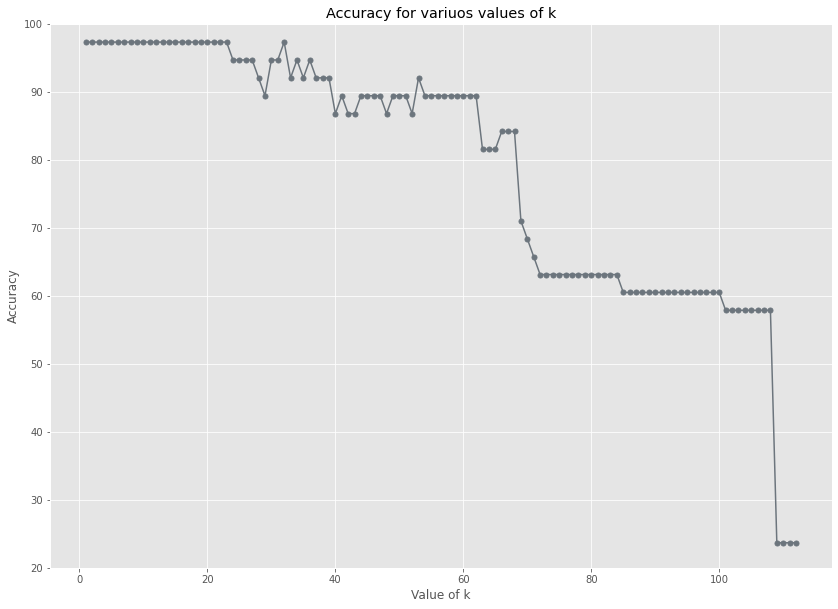

In [20]:
# Check accuracy for various values of k to choose most optimal one that has the highest accuracy.
score = []
kvalues = []

# Check whole range of data points in the train data.
for k in range(1,113):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    kvalues.append(k)
    score.append(knn.score(x_test,y_test) * 100)

plt.plot(kvalues, score, marker='o', markersize=5)
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.ylim(top = 100)
plt.title("Accuracy for variuos values of k");

#### — Conclusion

K-Nearest Neighbors is one of the simplest yet very powerful classification algorithm that gives fairly high accuracy. It requires no training for making predictions, which is usually one of the most difficult parts of a machine learning algorithm. The key aspect when using KNN is to choose an appropriate value of K – neither too big nor too small, in order to find the number that provides the highest accuracy. The model then, can make inaccurate prediction called overfitting or underfitting. Varying the test and training data size along with the K value will be a key to improve the accuracy of the model.

#### References

[1] — [K-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

[2] — [Sci-kit Learn: Neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)

[3] — [Sci-kit Learn: Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#neighbors)

[4] — [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

[5] — [RealPython: train-test-split](https://realpython.com/train-test-split-python-data/)

[6] — [K Nearest Neighbor Algorithm Explained](https://automateintellect.com/k-nearest-neighbor-explained/)

[7] — [K-Nearest Neighbors (Theory Explained)](https://medium.com/analytics-vidhya/machine-learing-k-nearest-neighbors-theory-explained-3dfe2fdcdc5d)

***